In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import statsmodels


In [2]:
df1 = pd.read_excel("D:\BTP\Amingaon.xlsx", converters= {'Time': pd.to_datetime},index_col='Time')

In [3]:
df1.head()

,Amingaon
Time,
2005-01-01,44.22
2005-03-01,45.84
2005-08-01,47.83
2005-11-01,47.23
2006-01-01,43.34


In [4]:
df1.count()

Amingaon    28
dtype: int64

In [5]:
df1.index

DatetimeIndex(['2005-01-01', '2005-03-01', '2005-08-01', '2005-11-01',
               '2006-01-01', '2006-03-01', '2006-08-01', '2006-11-01',
               '2007-01-01', '2007-03-01', '2007-08-01', '2007-11-01',
               '2008-01-01', '2008-03-01', '2008-08-01', '2008-11-01',
               '2009-01-01', '2009-03-01', '2009-08-01', '2009-11-01',
               '2010-01-01', '2010-03-01', '2010-08-01', '2010-11-01',
               '2011-01-01', '2011-03-01', '2011-08-01', '2011-11-01'],
              dtype='datetime64[ns]', name='Time', freq=None)

In [6]:
df1['2006']

,Amingaon
Time,
2006-01-01,43.34
2006-03-01,44.51
2006-08-01,46.27
2006-11-01,43.63


# Initial Look at the Data to check Stationarity

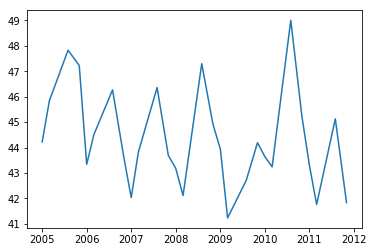

In [7]:
plt.plot(df1)

## Application of Rolling Statistics and Dicky-Fuller test to check Stationarity

In [8]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determining Rolling Stats
    
    rolmean=pd.rolling_mean(timeseries,window=4)
    rolstd=pd.rolling_std(timeseries,window=4)
    
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.xlabel('Year')
    plt.ylabel('Residual Value')

    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
     #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    ##print(rolmean.size)

In [9]:
ts = df1["Amingaon"]
ts.head(10)

Time
2005-01-01    44.22
2005-03-01    45.84
2005-08-01    47.83
2005-11-01    47.23
2006-01-01    43.34
2006-03-01    44.51
2006-08-01    46.27
2006-11-01    43.63
2007-01-01    42.03
2007-03-01    43.83
Name: Amingaon, dtype: float64

D:\anaconda\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
D:\anaconda\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).std()


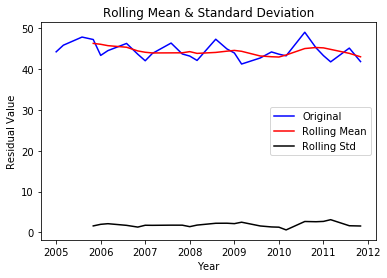

Results of Dickey-Fuller Test:
Test Statistic                 -2.741971
p-value                         0.067053
#Lags Used                      5.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


In [10]:
test_stationarity(ts)

# # The p-value is more than 6.7% for normal type data. Therefore it is difficult to reject the NULL hypothesis ( that the data is non-stationary ). Therefore, we are assuming here the data is non-stationary.

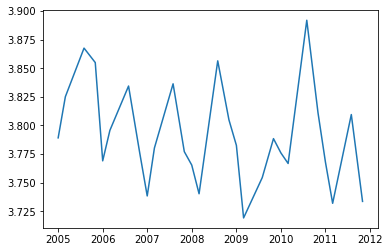

In [11]:
ts_log = np.log(ts)
plt.plot(ts_log)

D:\anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':
D:\anaconda\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
D:\anaconda\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).std()


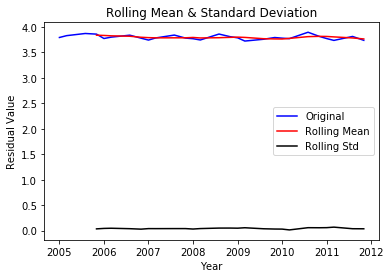

Results of Dickey-Fuller Test:
Test Statistic                 -2.704217
p-value                         0.073311
#Lags Used                      5.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


In [12]:
moving_avg = pd.rolling_mean(ts_log,12)
test_stationarity(ts_log)

# The p-value is more than 8.5% for log conversion of data. Therefore it is difficult to reject the NULL hypothesis ( that the data is non-stationary ). Therefore, we are assuming here the data is non-stationary.

# Let us try out more things to remove non-stationarity since the data is small in size, therefore most of the common techniques are useless here.

# Trying moving average method.

D:\anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
  if __name__ == '__main__':
D:\anaconda\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
D:\anaconda\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).std()


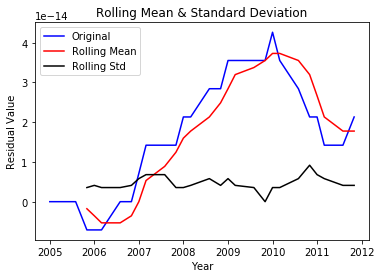

Results of Dickey-Fuller Test:
Test Statistic                 -1.085935
p-value                         0.720648
#Lags Used                      9.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


In [13]:
moving_avg = pd.rolling_mean(ts,1)
ts_moving_avg_diff = ts - moving_avg
##ts_moving_avg_diff.head(1)
test_stationarity(ts_moving_avg_diff)

In [14]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(1)

Time
2005-01-01   -40.430823
Name: Amingaon, dtype: float64

D:\anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
  from ipykernel import kernelapp as app
D:\anaconda\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
D:\anaconda\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).std()


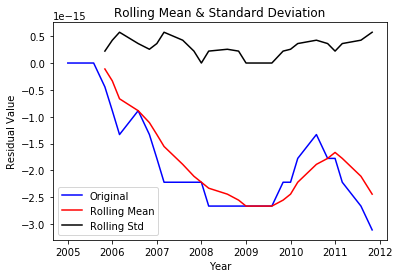

Results of Dickey-Fuller Test:
Test Statistic                  1.854996
p-value                         0.998452
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


In [15]:
ts_log = np.log(ts)
moving_avg = pd.rolling_mean(ts_log,1)
ts_log_moving_avg_diff = ts_log - moving_avg
##ts_log_moving_avg_diff.head(1)
test_stationarity(ts_log_moving_avg_diff)

# Trying with decompose model

D:\anaconda\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


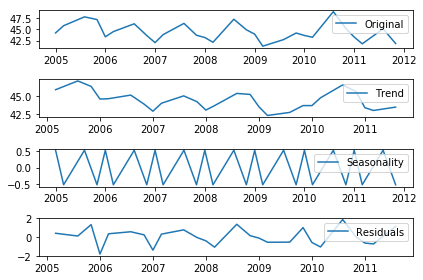

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts, freq=2)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

D:\anaconda\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
D:\anaconda\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).std()


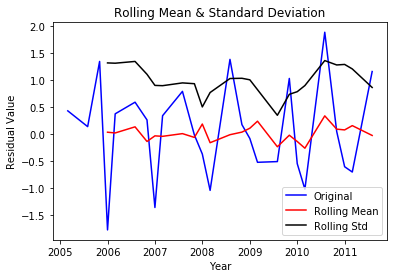

Results of Dickey-Fuller Test:
Test Statistic                 -4.628460
p-value                         0.000114
#Lags Used                      3.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


Time
2005-03-01    0.423462
2005-08-01    0.131538
2005-11-01    1.338462
2006-01-01   -1.780962
2006-03-01    0.368462
Name: Amingaon, dtype: float64

In [17]:
ts_decompose = residual
ts_decompose.dropna(inplace=True)
test_stationarity(ts_decompose)
ts_decompose.head()

# The value hence obtained is lesser than 1% therefore it gives us a Stationary Model. But the catch here is that we have had to lose 2 data-points. ( Read the documentation of seasonal decomposition )

In [18]:
ts_decompose.size

26

In [19]:
ts.size

28

In [20]:
ts_decompose

Time
2005-03-01    0.423462
2005-08-01    0.131538
2005-11-01    1.338462
2006-01-01   -1.780962
2006-03-01    0.368462
2006-08-01    0.584038
2006-11-01    0.255962
2007-01-01   -1.365962
2007-03-01    0.333462
2007-08-01    0.784038
2007-11-01   -0.024038
2008-01-01   -0.375962
2008-03-01   -1.049038
2008-08-01    1.376538
2008-11-01    0.168462
2009-01-01   -0.088462
2009-03-01   -0.529038
2009-08-01   -0.515962
2009-11-01    1.023462
2010-01-01   -0.553462
2010-03-01   -1.026538
2010-08-01    1.879038
2010-11-01    0.040962
2011-01-01   -0.610962
2011-03-01   -0.709038
2011-08-01    1.151538
Name: Amingaon, dtype: float64

In [21]:
decomposition1 = seasonal_decompose(ts,model='multiplicative', freq=2)

trend1 = decomposition1.trend
seasonal1 = decomposition1.seasonal
residual1 = decomposition1.resid

D:\anaconda\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


D:\anaconda\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
D:\anaconda\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).std()


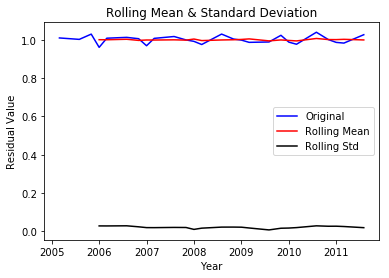

Results of Dickey-Fuller Test:
Test Statistic                 -4.793320
p-value                         0.000056
#Lags Used                      3.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


Time
2005-03-01    1.009628
2005-08-01    1.002168
2005-11-01    1.029595
2006-01-01    0.960564
2006-03-01    1.008323
Name: Amingaon, dtype: float64

In [22]:
ts_decompose1 = residual1
ts_decompose1.dropna(inplace=True)
test_stationarity(ts_decompose1)
ts_decompose1.head()

# Here we see that our data has much more multiplicative decomposive property than additive, and hence we have here obtained a value of even lesser than above. So here our p value is lesser than 0.5% There is almost all removal of any stationarity. So it is appropriate for development of our models

# We are now to find out models for future predictions. 
# Let us first find out the appropriate lags using ACF. These lags will then be used for ARMA/ARIMA models.

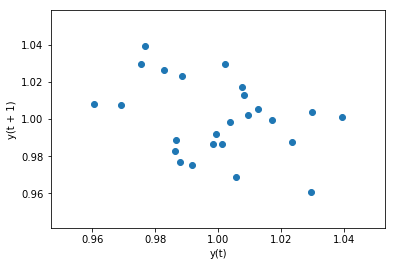

In [23]:
from pandas.tools.plotting import lag_plot
lag_plot(ts_decompose1)

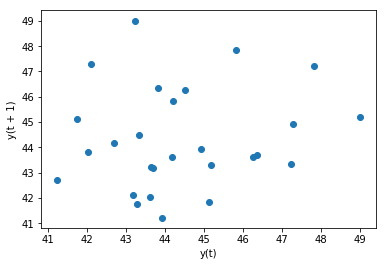

In [24]:
lag_plot(ts)

In [25]:
values = pd.DataFrame(ts_decompose1.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

         t-1      t+1
t-1  1.00000 -0.32866
t+1 -0.32866  1.00000


In [26]:
dataframe

,t-1,t+1
0,NaN,1.009628
1,1.009628,1.002168
2,1.002168,1.029595
3,1.029595,0.960564
4,0.960564,1.008323
5,1.008323,1.012676
6,1.012676,1.005672
7,1.005672,0.969004
8,0.969004,1.007470
9,1.007470,1.017123


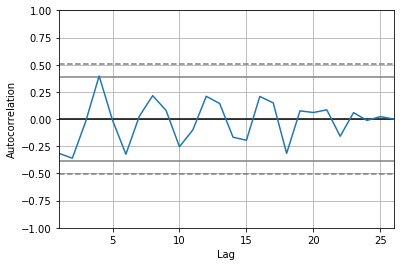

In [27]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(ts_decompose1)

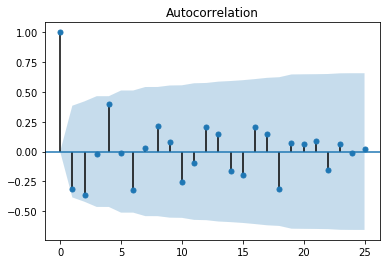

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
#series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
plot_acf(ts_decompose1, lags=25)
plt.show()

In [29]:
values = pd.DataFrame(ts_decompose1.values)
dataframe = pd.concat([values.shift(4), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

         t-1      t+1
t-1  1.00000  0.48937
t+1  0.48937  1.00000


predicted=0.993267, expected=0.987752
predicted=1.010714, expected=0.976819
predicted=1.011078, expected=1.039394
predicted=0.984175, expected=1.001144
predicted=1.000738, expected=0.986436
predicted=0.973815, expected=0.982834
predicted=0.999949, expected=1.026530
0.02158510864112627


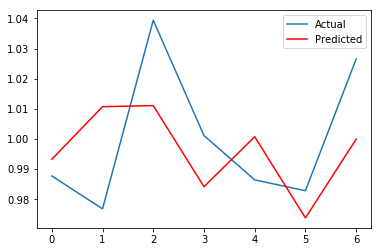

In [30]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import TimeSeriesSplit
import math
X=ts_decompose1.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-7], X[len(X)-7:]
    model = AR(train)
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print(error)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()    
    

In [31]:
print(train)

[ 1.00216799  1.02959499  0.96056434  1.00832337  1.01267597  1.00567182
  0.96900431  1.0074699   1.01712267  0.9993135   0.99181682  0.97541398
  1.02980417  1.00389868  0.99831612  0.98665737  0.98860111  1.02341826]


predicted=-1.046721, expected=1.039394
predicted=-1.071808, expected=1.001144
predicted=-1.088073, expected=0.986436
predicted=-1.059098, expected=0.982834
predicted=-1.048983, expected=1.026530
2.0702576318250707


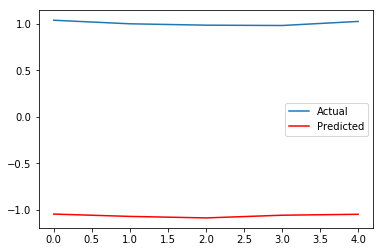

In [32]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import TimeSeriesSplit
import math
X=ts_decompose1.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-5], X[len(X)-5:]
    model = ARIMA(train, order=(2, 1, 1))
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print(error)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()    
    

predicted=1.007976, expected=0.976819
predicted=1.007509, expected=1.039394
predicted=0.988596, expected=1.001144
predicted=1.006745, expected=0.986436
predicted=0.972659, expected=0.982834
predicted=0.997114, expected=1.026530
0.02424240948566951


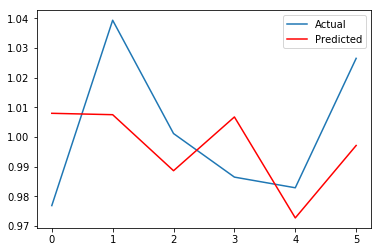

In [33]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import TimeSeriesSplit
import math
X=ts_decompose1.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-6], X[len(X)-6:]
    model = AR(train)
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print(error)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

# From now on, we shall be trying upon the different methods for prediction of data points using different methods of time series forcasting and also use various types of data training sets to train our model, i.e, we will look into the decomposed data for both multiplicative and the additive domain. We will then choose out the best of them all for predictive modelling.                                                                                                                                                                                  The two methods for finding out the best prediction model we will look into RMSE and AIC values ( As in reference to the paper "Regression and time series model selection in small samples" ) which state that both of them to be lower to have better results.

# # AutoRegression

In [34]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tools.eval_measures import aicc
from statsmodels.tsa.arima_model import ARMAResults 

- Additive model of Decomposition.

predicted=0.408996, expected=-1.026538
predicted=0.391835, expected=1.879038
predicted=-0.604169, expected=0.040962
predicted=0.318721, expected=-0.610962
predicted=-1.252017, expected=-0.709038
predicted=-0.166896, expected=1.151538
RMSE error=
1.1244354423498868
AIC=
-1.84991095171


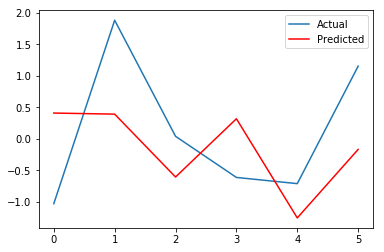

In [35]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import TimeSeriesSplit
import math
X=ts_decompose.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-6], X[len(X)-6:]
    model = AR(train)
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print("RMSE error=")
print(error)
print("AIC=")
print(model_fit.aic)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

# Here both the AIC and the AICc criterion will be same.

- Multiplicative model of Decomposition

predicted=1.007976, expected=0.976819
predicted=1.007509, expected=1.039394
predicted=0.988596, expected=1.001144
predicted=1.006745, expected=0.986436
predicted=0.972659, expected=0.982834
predicted=0.997114, expected=1.026530
RMSE error=
0.02424240948566951
AIC=
-9.70414794857


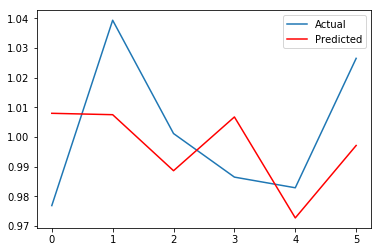

In [36]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import TimeSeriesSplit
import math
X=ts_decompose1.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-6], X[len(X)-6:]
    model = AR(train)
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print("RMSE error=")
print(error)
print("AIC=")
print(model_fit.aic)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

# Here both the AIC and the AICc criterion will be same.

# # Moving Average (order 1)

- Additive model for decomposition

predicted=-0.005507, expected=-1.026538
predicted=-0.005507, expected=1.879038
predicted=-0.005507, expected=0.040962
predicted=-0.005507, expected=-0.610962
predicted=-0.005507, expected=-0.709038
predicted=-0.005507, expected=1.151538
RMSE error=
1.0643043454502494
AIC=
39.84659616953658


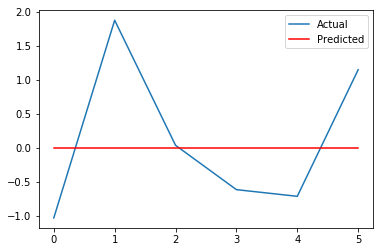

In [37]:
from statsmodels.tsa.arima_model import ARMA
X=ts_decompose.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-6], X[len(X)-6:]
    model = ARMA(train,order=(0, 1))
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print("RMSE error=")
print(error)
print("AIC=")
print(model_fit.aic)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

# # Here both the AIC and the AICc criterion will be same.

- Multiplicative model for decomposition

predicted=0.999621, expected=0.976819
predicted=0.999621, expected=1.039394
predicted=0.999621, expected=1.001144
predicted=0.999621, expected=0.986436
predicted=0.999621, expected=0.982834
predicted=0.999621, expected=1.026530
RMSE error=
0.023394677010581743
AIC=
-104.62983556964397


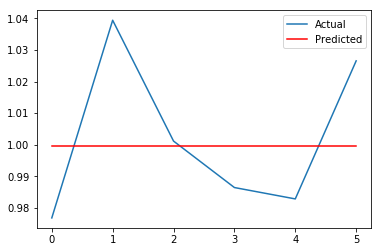

In [38]:
# from statsmodels.tsa.arima_model import ARMA
X=ts_decompose1.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-6], X[len(X)-6:]
    model = ARMA(train,order=(0, 1))
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print("RMSE error=")
print(error)
print("AIC=")
print(model_fit.aic)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

# # Here both the AIC and the AICc criterion will be same.

# Autoregressive Moving Average

- Additive 

D:\anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-0.414733, expected=-1.026538
predicted=0.559229, expected=1.879038
predicted=0.044522, expected=0.040962
predicted=-1.032594, expected=-0.610962
predicted=0.129276, expected=-0.709038
predicted=0.506111, expected=1.151538
RMSE error=
0.7542476035433765
AIC=
37.01636323719528


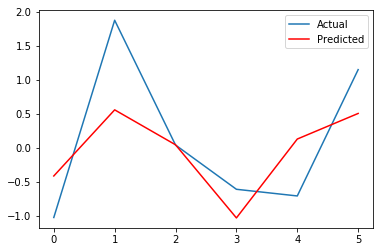

In [39]:
# from statsmodels.tsa.arima_model import ARMA
X=ts_decompose.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-6], X[len(X)-6:]
    model = ARMA(train,order=(2, 1))
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print("RMSE error=")
print(error)
print("AIC=")
print(model_fit.aic)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

In [40]:
print(ARMAResults.summary(model_fit))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   19
Model:                     ARMA(2, 1)   Log Likelihood                 -13.508
Method:                       css-mle   S.D. of innovations              0.434
Date:                Sun, 21 Apr 2019   AIC                             37.016
Time:                        22:43:47   BIC                             41.739
Sample:                             0   HQIC                            37.816
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0104      0.011     -0.991      0.338        -0.031     0.010
ar.L1.y       -0.2648      0.189     -1.404      0.181        -0.634     0.105
ar.L2.y       -0.5382      0.181     -2.981      0.0

In [41]:
print("AICc=")
print(aicc(-13.508,19,1))

AICc=
29.251294117647056


- Multiplicative

predicted=0.159901, expected=0.976819
predicted=0.183209, expected=1.039394
predicted=0.173650, expected=1.001144
predicted=0.147308, expected=0.986436
predicted=0.173061, expected=0.982834
predicted=0.182443, expected=1.026530
RMSE error=
0.8324168409747504
AIC=
-107.62332404665517


D:\anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


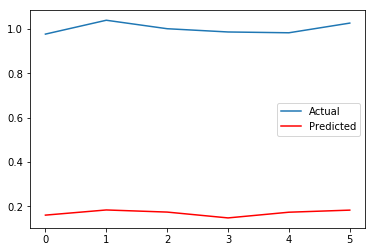

In [42]:
# from statsmodels.tsa.arima_model import ARMA
X=ts_decompose1.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-6], X[len(X)-6:]
    model = ARMA(train,order=(2, 1))
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print("RMSE error=")
print(error)
print("AIC=")
print(model_fit.aic)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

In [43]:
print(ARMAResults.summary(model_fit))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   19
Model:                     ARMA(2, 1)   Log Likelihood                  58.812
Method:                       css-mle   S.D. of innovations              0.010
Date:                Sun, 21 Apr 2019   AIC                           -107.623
Time:                        22:43:48   BIC                           -102.901
Sample:                             0   HQIC                          -106.824
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.9995      0.000   4153.941      0.000         0.999     1.000
ar.L1.y       -0.2534      0.187     -1.352      0.196        -0.621     0.114
ar.L2.y       -0.5758      0.177     -3.258      0.0

In [44]:
print("AICc=")
print(aicc(58.812,19,1))

AICc=
-115.38870588235294


# Auto Regressive Integrated Moving Average Model ( Here I > 2 is not supported)

- Additive (3,1,1)

predicted=0.009658, expected=-1.026538
predicted=0.586172, expected=1.879038
predicted=-0.373531, expected=0.040962
predicted=-0.826794, expected=-0.610962
predicted=-0.872321, expected=-0.709038
predicted=1.071856, expected=1.151538
RMSE error=
0.7067065233781672
AIC=
44.64815317924304


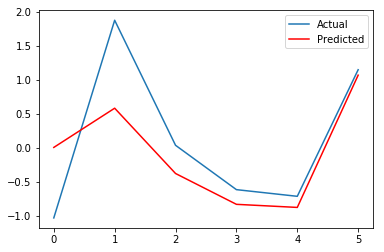

In [45]:
from statsmodels.tsa.arima_model import ARIMA
X=ts_decompose.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-6], X[len(X)-6:]
    model = ARIMA(train,order=(3,1,1))
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print("RMSE error=")
print(error)
print("AIC=")
print(model_fit.aic)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

In [46]:
print(ARMAResults.summary(model_fit))

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   18
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 -16.324
Method:                       css-mle   S.D. of innovations              0.480
Date:                Sun, 21 Apr 2019   AIC                             44.648
Time:                        22:43:49   BIC                             49.990
Sample:                             1   HQIC                            45.385
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0029      0.008     -0.382      0.709        -0.018     0.012
ar.L1.D.y     -0.8554      0.157     -5.444      0.000        -1.163    -0.547
ar.L2.D.y     -0.8149      0.161     -5.076      0.0

In [47]:
print("AICc=")
print(aicc(-16.324,18,1))

AICc=
34.898


- Multiplicative (3,1,1)

D:\anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-2.404680, expected=0.976819
predicted=-2.391706, expected=1.039394
predicted=-2.410241, expected=1.001144
predicted=-2.420555, expected=0.986436
predicted=-2.422564, expected=0.982834
predicted=-2.379473, expected=1.026530
RMSE error=
3.4070933661512894
AIC=
-92.50509072327867


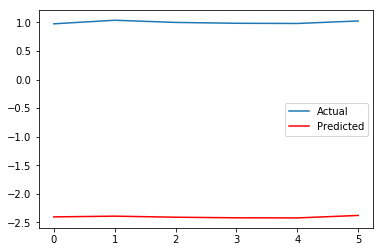

In [48]:
from statsmodels.tsa.arima_model import ARIMA
X=ts_decompose1.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-6], X[len(X)-6:]
    model = ARIMA(train,order=(3,1,1))
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print("RMSE error=")
print(error)
print("AIC=")
print(model_fit.aic)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

In [49]:
print(ARMAResults.summary(model_fit))

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   18
Model:                 ARIMA(3, 1, 1)   Log Likelihood                  52.253
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sun, 21 Apr 2019   AIC                            -92.505
Time:                        22:43:50   BIC                            -87.163
Sample:                             1   HQIC                           -91.768
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -7.804e-05      0.000     -0.469      0.647        -0.000     0.000
ar.L1.D.y     -0.8561      0.154     -5.548      0.000        -1.159    -0.554
ar.L2.D.y     -0.8161      0.158     -5.154      0.0

- Additive (4,1,1)

D:\anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.224158, expected=-1.026538
predicted=0.996441, expected=1.879038
predicted=-0.854408, expected=0.040962
predicted=-0.933134, expected=-0.610962
predicted=-0.889020, expected=-0.709038
predicted=0.658401, expected=1.151538
RMSE error=
0.7664072190563092
AIC=
43.71779374255536


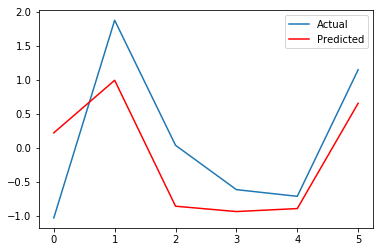

In [50]:
from statsmodels.tsa.arima_model import ARIMA
X=ts_decompose.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-6], X[len(X)-6:]
    model = ARIMA(train,order=(4,1,1))
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print("RMSE error=")
print(error)
print("AIC=")
print(model_fit.aic)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

In [51]:
print(ARMAResults.summary(model_fit))

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   18
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 -14.859
Method:                       css-mle   S.D. of innovations              0.426
Date:                Sun, 21 Apr 2019   AIC                             43.718
Time:                        22:43:52   BIC                             49.950
Sample:                             1   HQIC                            44.577
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0019      0.005     -0.383      0.708        -0.012     0.008
ar.L1.D.y     -1.1741      0.214     -5.479      0.000        -1.594    -0.754
ar.L2.D.y     -1.1926      0.244     -4.879      0.0

In [52]:
print("AICc=")
print(aicc(-14.859,18,1))

AICc=
31.968


- Multiplicative (4,1,1) -> shows error

- Additive (5,1,1)

D:\anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.179957, expected=-1.026538
predicted=0.883227, expected=1.879038
predicted=-0.869767, expected=0.040962
predicted=-0.796776, expected=-0.610962
predicted=-0.866738, expected=-0.709038
predicted=0.674702, expected=1.151538
RMSE error=
0.770656160896796
AIC=
45.61467549541472


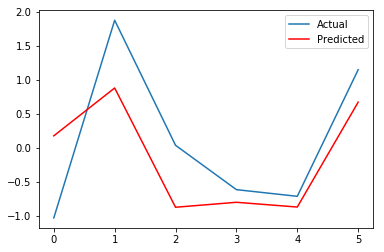

In [53]:
from statsmodels.tsa.arima_model import ARIMA
X=ts_decompose.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-6], X[len(X)-6:]
    model = ARIMA(train,order=(5,1,1))
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print("RMSE error=")
print(error)
print("AIC=")
print(model_fit.aic)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

In [54]:
print(ARMAResults.summary(model_fit))

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   18
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 -14.807
Method:                       css-mle   S.D. of innovations              0.427
Date:                Sun, 21 Apr 2019   AIC                             45.615
Time:                        22:43:55   BIC                             52.738
Sample:                             1   HQIC                            46.597
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0025      0.006     -0.434      0.673        -0.014     0.009
ar.L1.D.y     -1.1186      0.277     -4.032      0.002        -1.662    -0.575
ar.L2.D.y     -1.0725      0.452     -2.374      0.0

In [55]:
print("AICc=")
print(aicc(-14.807,18,1))

AICc=
31.864


- Multiplicative (5,1,1)

predicted=-3.570398, expected=0.976819
predicted=-3.555650, expected=1.039394
predicted=-3.591411, expected=1.001144
predicted=-3.590029, expected=0.986436
predicted=-3.592902, expected=0.982834
predicted=-3.558591, expected=1.026530
RMSE error=
4.5787171497315455
AIC=
-91.92124285297282


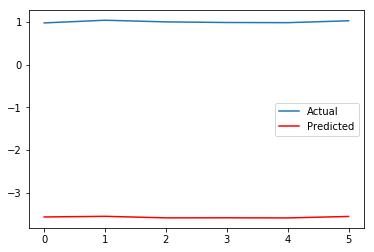

In [56]:
from statsmodels.tsa.arima_model import ARIMA
X=ts_decompose1.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-6], X[len(X)-6:]
    model = ARIMA(train,order=(5,1,1))
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print("RMSE error=")
print(error)
print("AIC=")
print(model_fit.aic)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

In [57]:
print(ARMAResults.summary(model_fit))

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   18
Model:                 ARIMA(5, 1, 1)   Log Likelihood                  53.961
Method:                       css-mle   S.D. of innovations              0.009
Date:                Sun, 21 Apr 2019   AIC                            -91.921
Time:                        22:43:56   BIC                            -84.798
Sample:                             1   HQIC                           -90.939
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -4.203e-05      0.000     -0.356      0.729        -0.000     0.000
ar.L1.D.y     -1.1305      0.280     -4.042      0.002        -1.679    -0.582
ar.L2.D.y     -1.1014      0.456     -2.417      0.0

In [58]:
print("AICc=")
print(aicc(53.961,18,1))

AICc=
-105.672


- Additive (2,2,1)

predicted=-0.071706, expected=-1.026538
predicted=0.986889, expected=1.879038
predicted=-0.865048, expected=0.040962
predicted=-0.886503, expected=-0.610962
predicted=0.418952, expected=-0.709038
predicted=0.787180, expected=1.151538
RMSE error=
0.8174686130362847
AIC=
66.18431062484672


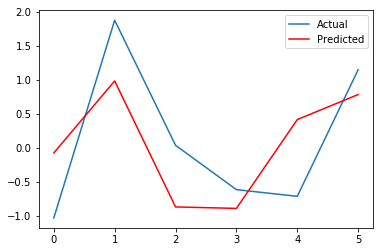

In [59]:
from statsmodels.tsa.arima_model import ARIMA
X=ts_decompose.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-6], X[len(X)-6:]
    model = ARIMA(train,order=(2,2,1))
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print("RMSE error=")
print(error)
print("AIC=")
print(model_fit.aic)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

In [60]:
print(ARMAResults.summary(model_fit))

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   17
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 -28.092
Method:                       css-mle   S.D. of innovations              1.087
Date:                Sun, 21 Apr 2019   AIC                             66.184
Time:                        22:43:57   BIC                             70.350
Sample:                             2   HQIC                            66.598
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0028      0.027      0.104      0.919        -0.049     0.055
ar.L1.D2.y    -0.7119      0.218     -3.264      0.006        -1.139    -0.284
ar.L2.D2.y    -0.4577      0.253     -1.807      0.0

In [61]:
print("AICc=")
print(aicc(-28.092,18,1))

AICc=
58.434


- Multiplicative (2,2,1)

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:492: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:493: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:493: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:494: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:495: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:495: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


predicted=-1.161891, expected=0.976819
predicted=-1.138117, expected=1.039394
predicted=-1.177758, expected=1.001144
predicted=-1.178586, expected=0.986436
predicted=-1.150967, expected=0.982834
predicted=-1.141809, expected=1.026530
RMSE error=
2.160454042172497
AIC=
-62.955000034132425


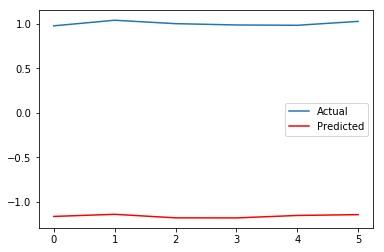

In [62]:
from statsmodels.tsa.arima_model import ARIMA
X=ts_decompose1.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-6], X[len(X)-6:]
    model = ARIMA(train,order=(2,2,1))
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print("RMSE error=")
print(error)
print("AIC=")
print(model_fit.aic)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

In [63]:
print(ARMAResults.summary(model_fit))

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   17
Model:                 ARIMA(2, 2, 1)   Log Likelihood                  36.478
Method:                       css-mle   S.D. of innovations              0.024
Date:                Sun, 21 Apr 2019   AIC                            -62.955
Time:                        22:43:57   BIC                            -58.789
Sample:                             2   HQIC                           -62.541
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       7.417e-05      0.001      0.124      0.903        -0.001     0.001
ar.L1.D2.y    -0.7118      0.219     -3.249      0.006        -1.141    -0.282
ar.L2.D2.y    -0.4483      0.254     -1.766      0.1

In [64]:
print("AICc=")
print(aicc(36.478,18,1))

AICc=
-70.706


- Additive (3,2,1)

predicted=0.006439, expected=-1.026538
predicted=0.788550, expected=1.879038
predicted=-0.566761, expected=0.040962
predicted=-0.987740, expected=-0.610962
predicted=-0.770005, expected=-0.709038
predicted=1.224838, expected=1.151538
RMSE error=
0.6802680021620365
AIC=
59.66089873684499


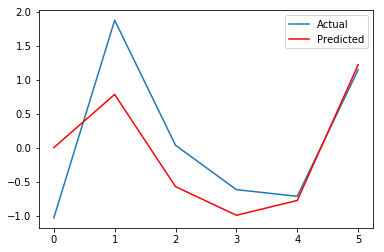

In [65]:
from statsmodels.tsa.arima_model import ARIMA
X=ts_decompose.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-6], X[len(X)-6:]
    model = ARIMA(train,order=(3,2,1))
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print("RMSE error=")
print(error)
print("AIC=")
print(model_fit.aic)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

In [66]:
print(ARMAResults.summary(model_fit))

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   17
Model:                 ARIMA(3, 2, 1)   Log Likelihood                 -23.830
Method:                       css-mle   S.D. of innovations              0.775
Date:                Sun, 21 Apr 2019   AIC                             59.661
Time:                        22:43:58   BIC                             64.660
Sample:                             2   HQIC                            60.158
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0010      0.013     -0.080      0.937        -0.026     0.024
ar.L1.D2.y    -1.0000      0.165     -6.076      0.000        -1.323    -0.677
ar.L2.D2.y    -0.8939      0.201     -4.451      0.0

In [67]:
print("AICc=")
print(aicc(-23.830,17,1))

AICc=
49.92666666666666


- Multiplicative (3,2,1)

predicted=-2.598647, expected=0.976819
predicted=-2.581032, expected=1.039394
predicted=-2.608074, expected=1.001144
predicted=-2.617719, expected=0.986436
predicted=-2.613919, expected=0.982834
predicted=-2.569910, expected=1.026530
RMSE error=
3.6004361551176807
AIC=
-69.52613273523167


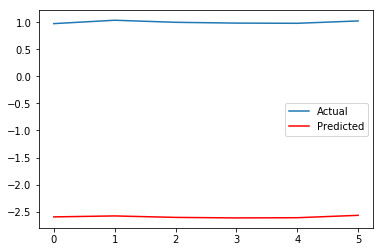

In [68]:
from statsmodels.tsa.arima_model import ARIMA
X=ts_decompose1.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-6], X[len(X)-6:]
    model = ARIMA(train,order=(3,2,1))
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print("RMSE error=")
print(error)
print("AIC=")
print(model_fit.aic)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

In [69]:
print(ARMAResults.summary(model_fit))

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   17
Model:                 ARIMA(3, 2, 1)   Log Likelihood                  40.763
Method:                       css-mle   S.D. of innovations              0.017
Date:                Sun, 21 Apr 2019   AIC                            -69.526
Time:                        22:43:59   BIC                            -64.527
Sample:                             2   HQIC                           -69.029
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -1.69e-05      0.000     -0.059      0.954        -0.001     0.001
ar.L1.D2.y    -0.9951      0.164     -6.058      0.000        -1.317    -0.673
ar.L2.D2.y    -0.8875      0.201     -4.420      0.0

In [70]:
print("AICc=")
print(aicc(40.763,17,1))

AICc=
-79.25933333333333


- Additive (5,2,1)

D:\anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.457859, expected=-1.026538
predicted=1.499375, expected=1.879038
predicted=-1.192998, expected=0.040962
predicted=-1.301631, expected=-0.610962
predicted=-1.109852, expected=-0.709038
predicted=0.531348, expected=1.151538
RMSE error=
0.9030088046313225
AIC=
54.94877436435722


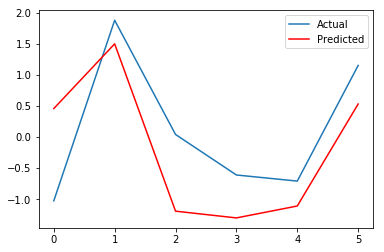

In [71]:
from statsmodels.tsa.arima_model import ARIMA
X=ts_decompose.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-6], X[len(X)-6:]
    model = ARIMA(train,order=(5,2,1))
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print("RMSE error=")
print(error)
print("AIC=")
print(model_fit.aic)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

In [72]:
print(ARMAResults.summary(model_fit))

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   17
Model:                 ARIMA(5, 2, 1)   Log Likelihood                 -19.474
Method:                       css-mle   S.D. of innovations              0.536
Date:                Sun, 21 Apr 2019   AIC                             54.949
Time:                        22:44:01   BIC                             61.614
Sample:                             2   HQIC                            55.611
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0011      0.005     -0.201      0.844        -0.011     0.009
ar.L1.D2.y    -1.5975      0.253     -6.309      0.000        -2.094    -1.101
ar.L2.D2.y    -1.7362      0.457     -3.803      0.0

In [73]:
print("AICc=")
print(aicc(-19.474,17,1))

AICc=
41.214666666666666


- Multiplicative (5,2,1)

D:\anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC=
-73.76798864182035
predicted=-6.542143, expected=0.976819
predicted=-6.518822, expected=1.039394
predicted=-6.575004, expected=1.001144
predicted=-6.579501, expected=0.986436
predicted=-6.575327, expected=0.982834
predicted=-6.539272, expected=1.026530
RMSE error=
7.5572260839016305


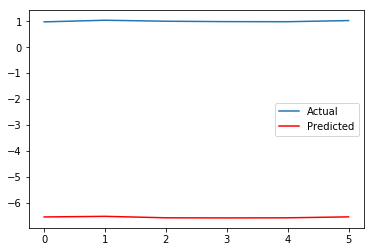

In [74]:
from statsmodels.tsa.arima_model import ARIMA
X=ts_decompose1.values
tscv = TimeSeriesSplit(n_splits=3)
for t in range(0,1):
    train, test = X[1:len(X)-6], X[len(X)-6:]
    model = ARIMA(train,order=(5,2,1))
    model_fit = model.fit()
    print("AIC=")
    print(model_fit.aic)
    window = model_fit.k_ar
    coef = model_fit.params
# walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print("RMSE error=")
print(error)
##accuracy_score(test,predictions)
##print(accuracy_score)
plt.plot(test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

In [75]:
print(ARMAResults.summary(model_fit))

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   17
Model:                 ARIMA(5, 2, 1)   Log Likelihood                  44.884
Method:                       css-mle   S.D. of innovations              0.012
Date:                Sun, 21 Apr 2019   AIC                            -73.768
Time:                        22:44:04   BIC                            -67.102
Sample:                             2   HQIC                           -73.105
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -2.964e-05      0.000     -0.273      0.790        -0.000     0.000
ar.L1.D2.y    -1.6275      0.277     -5.868      0.000        -2.171    -1.084
ar.L2.D2.y    -1.8698      0.510     -3.663      0.0

In [76]:
print("AICc=")
print(aicc(44.884,17,1))

AICc=
-87.50133333333333


# Did Holtwinter's technique from JP, and saw the RMSE term for both of them. Additive and Multiplicative both.


# We shall now try to convert this time series into a Supervised Learning Problem ( has been bookmarked, also a paper for same has been bookmarked. )  Corresponding code for Naive Bayes has also been bookmarked. 

# These graphs are for Holt Winters.

In [77]:
add_1 = pd.read_excel("D:\\BTP\\A-1.xlsx")

In [78]:
add_2= pd.read_excel("D:\\BTP\\A-2.xlsx")

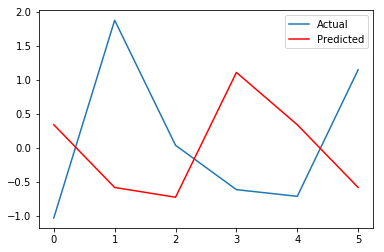

In [79]:
plt.plot(add_1,label='Actual')
plt.plot(add_2, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

In [80]:
mul_1 = pd.read_excel("D:\\BTP\\M-1.xlsx")
mul_2 = pd.read_excel("D:\\BTP\\M-2.xlsx")

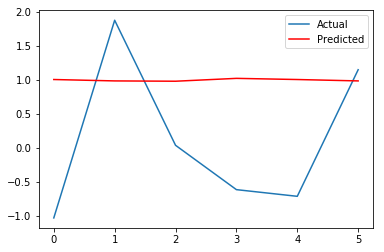

In [81]:
plt.plot(mul_1,label='Actual')
plt.plot(mul_2, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()

# Now we shall convert the time series into a Supervised Learning problem and discuss the results.

# For conversion of Series into the Supervised Funtion, we use the shift funtion 

# Let us convert the original dataset into a Supervised dataset, since we do not need a dataset which is stationary in nature, and look at the predictions.

In [82]:
from pandas import DataFrame
df = DataFrame(df1)
df2=DataFrame()
df2['t']=df['Amingaon']
df2=df2.reset_index(drop=True)
df2['t-1'] = df2['t'].shift(1)
df2=df2.dropna()
df2

,t,t-1
1,45.84,44.22
2,47.83,45.84
3,47.23,47.83
4,43.34,47.23
5,44.51,43.34
6,46.27,44.51
7,43.63,46.27
8,42.03,43.63
9,43.83,42.03
10,46.36,43.83


# In order to apply Supervised Learning techniques it is always advisable to remove the trend. So Applying simple differencing to remove the trend in the time series.

In [83]:
df4=DataFrame(df1).diff()

from pandas import DataFrame
df5 = DataFrame(df4)
df6=DataFrame()
df6['t']=df5['Amingaon']
df6=df6.reset_index(drop=True)
df6['t-1'] = df6['t'].shift(1)
df6['t-2']=df6['t'].shift(2)
df6=df6.dropna()
df6

,t,t-1,t-2
3,-0.60,1.99,1.62
4,-3.89,-0.60,1.99
5,1.17,-3.89,-0.60
6,1.76,1.17,-3.89
7,-2.64,1.76,1.17
8,-1.60,-2.64,1.76
9,1.80,-1.60,-2.64
10,2.53,1.80,-1.60
11,-2.67,2.53,1.80
12,-0.51,-2.67,2.53


In [84]:
X=df6.iloc[:,0:2]
y=df6.iloc[:,2]

# Gaussian NB. To apply this we need to do Binning, since Gaussian NB is a method of Classification, and cannot predict continous variables. Therefore we will be doing binning. ( Bookmarked )


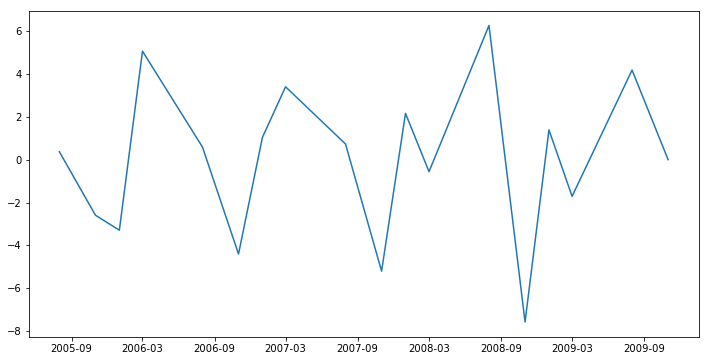

In [85]:
test_period = 20

train = df4.iloc[:test_period]
test = df4.iloc[test_period:]
trend_removed = train.diff()


plt.figure(figsize = (12,6))
plt.plot(trend_removed)


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.linear_model import BayesianRidge

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [122]:
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline','BayesianRidge']
   # X_train = X_train.drop(columns='Grade')
    #X_test = X_test.drop(columns='Grade')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    model7 = BayesianRidge(compute_score=True)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    #Drop indexes for X_test and y_test
    X_test=X_test.reset_index(drop=True)
    y_test=y_test.reset_index(drop=True)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6, model7]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        plt.plot(y_test,label='Actual')
        plt.plot(predictions, color='red',label='Predicted')
        plt.legend(loc='best')
        plt.show()
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.ix[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    plt.plot(y_test,label='Actual')
    plt.plot([-0.795,-0.795,-0.795,-0.795,-0.795,-0.795,-0.795,-0.795,-0.795], color='red',label='Predicted')
    plt.legend(loc='best')
    plt.show()
    print(baseline)

    results.ix['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = 0.33,
                                                        random_state=42)

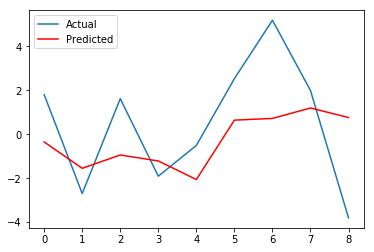

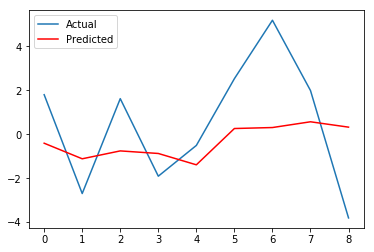

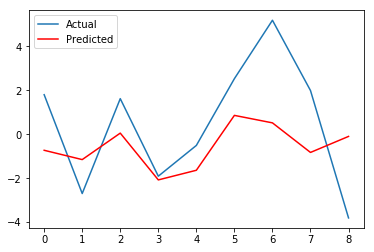

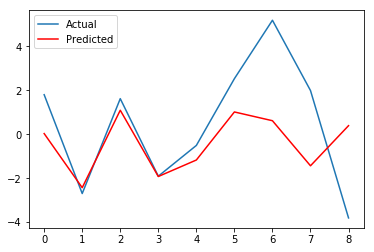

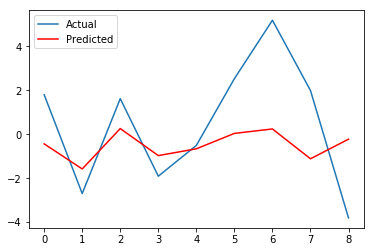

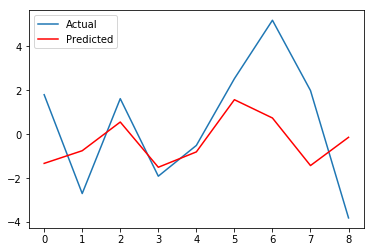

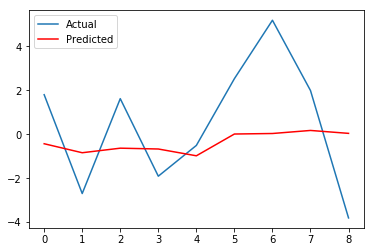

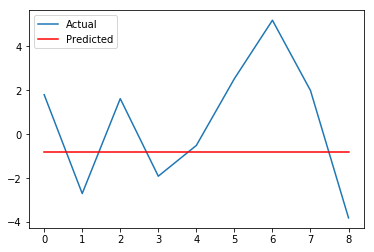

-0.795


In [124]:
results = evaluate(X_train, X_test, y_train, y_test)

In [99]:
results

,mae,rmse
Linear Regression,2.20403,2.59248
ElasticNet Regression,2.31074,2.64594
Random Forest,2.35498,2.67657
Extra Trees,1.97604,2.5639
SVM,2.2161,2.62974
Gradient Boosted,2.15585,2.61418
Baseline,2.60278,3.00448
BayesianRidge,NaN,NaN


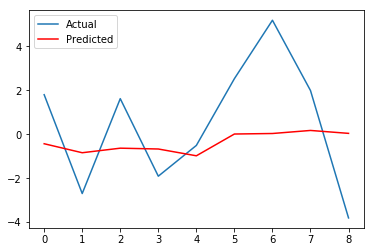

mae= 2.3776493619955037
rmse= 2.71500676303


In [108]:
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
model7 = BayesianRidge(compute_score=True)
model7.fit(X_train, y_train)
predictions = model7.predict(X_test)
plt.plot(y_test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()
        
        # Metrics
mae = np.mean(abs(predictions - y_test))
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print("mae=",mae)
print("rmse=",rmse)

In [121]:
print(y_test)

11    1.80
19   -2.70
3     1.62
26   -1.91
14   -0.51
12    2.53
16    5.19
4     1.99
25   -3.81
Name: t-2, dtype: float64


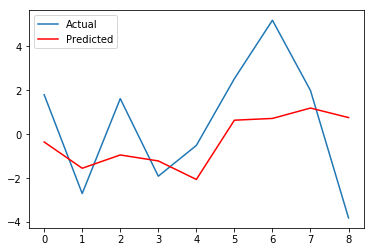

mae= 2.2044599020988986
rmse= 2.59255434678


In [128]:
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.0010,normalize=True)
ridgereg.fit(X_train,y_train)
predictions = ridgereg.predict(X_test)
plt.plot(y_test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()
mae = np.mean(abs(predictions - y_test))
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print("mae=",mae)
print("rmse=",rmse)

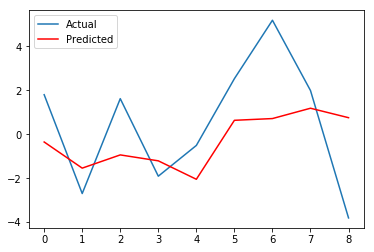

mae= 2.205841206565589
rmse= 2.59279480578


In [132]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.0010,normalize=True, max_iter=1e5)
lassoreg.fit(X_train,y_train)
predictions = lassoreg.predict(X_test)
plt.plot(y_test,label='Actual')
plt.plot(predictions, color='red',label='Predicted')
plt.legend(loc='best')
plt.show()
mae = np.mean(abs(predictions - y_test))
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print("mae=",mae)
print("rmse=",rmse)